# 算法初探

# 一、算法

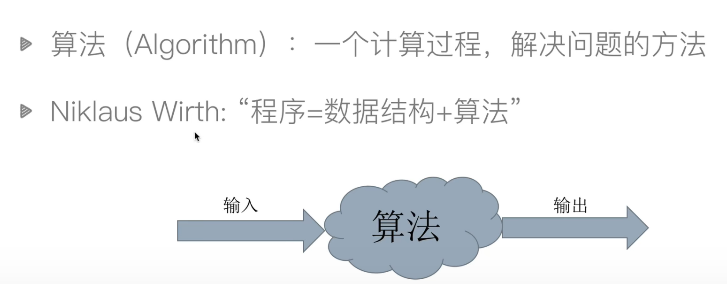

# 二、时间复杂度初探

## 先看

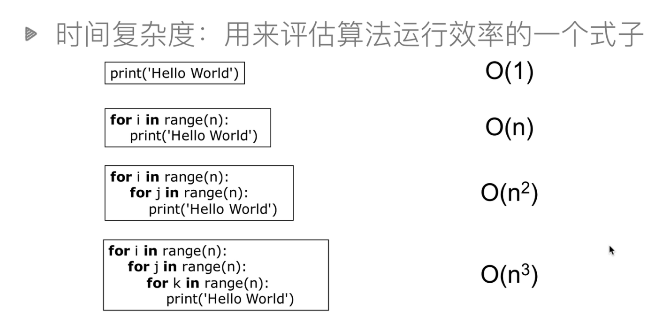

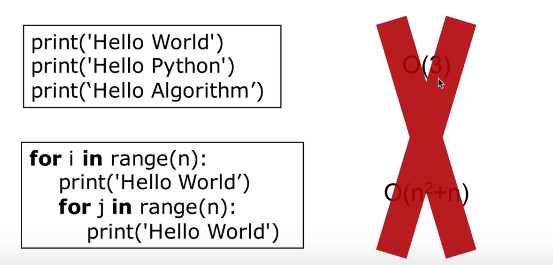

### 注意此处不应当是O（3）和O（n²+n）
### 正确答案是O（1）和O（n²） 我们可以把1和n²看作一个单位

## 再看

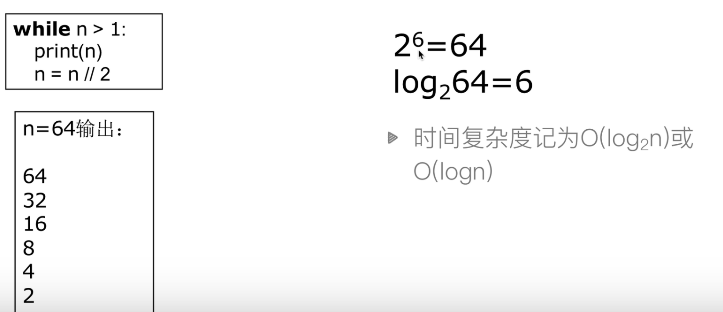

## 总结

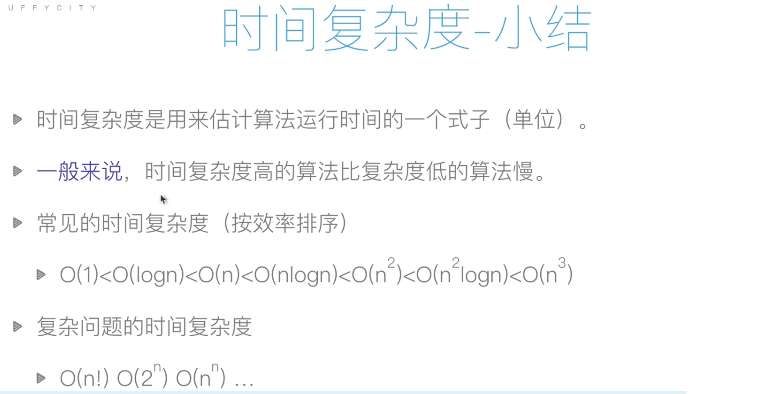

# 三、时间复杂度习题

## 如何判断时间复杂度呢?以下方法适用于大部分问题。

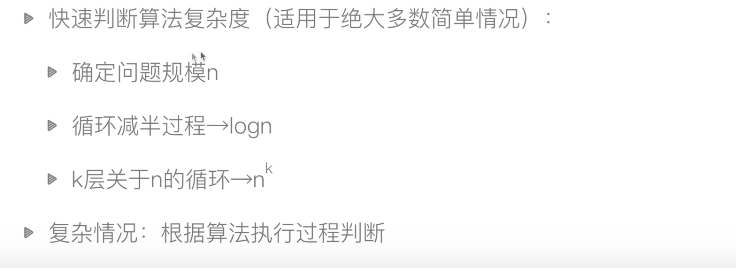

## 看习题

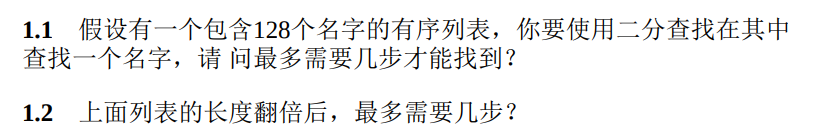
### （二分法就是不断折中寻找目标啦）

### 答案
### 1.1 log2(128) = 7
### 1.2 8次
### 翻了一倍，只多了一次！

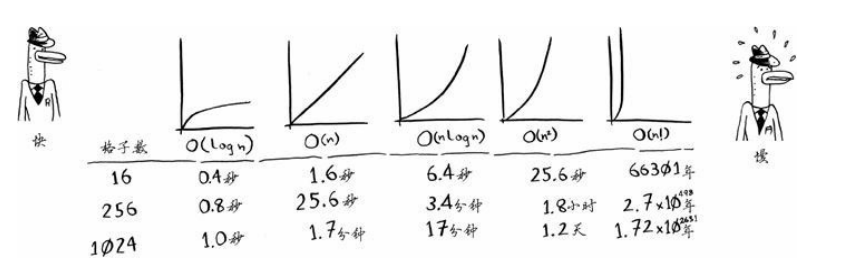

### 这里要强调一点，我们举个栗子吧！现在有16个数，我们使用O（n）复杂度方法，也就是16次，我们使用O（logn）时，是4次。貌似不是太多。 但是！！！我们如果变成32次，O（logn)只需要增加1次。如果我们现在是XXXXXXXXXXX次，这个数我也不知道是多少，姑且算作2的128次方，那是一个非常大的数啊，我们再乘个2，使用O（n)，次数可想而知。但是我们使用O(logn),这么大数，也就129次。因此时间复杂度越大的方法，随着数据量的增多，就会变得越复杂！

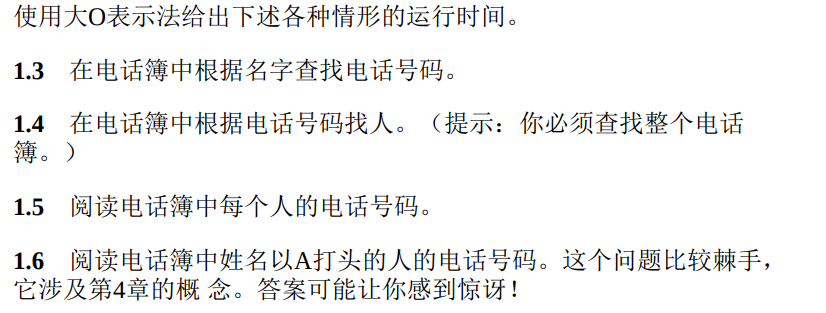

## 答案

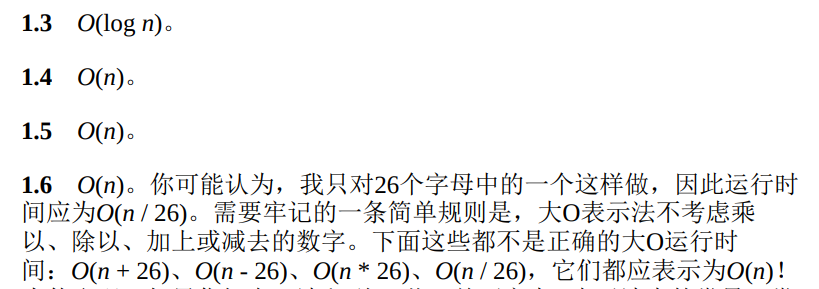

### 1.6的题目就是我们刚才所说的，我们没有所谓的n/26，n+26等等，这里统统都称为n啦，n可以看作是单位

# 四、空间复杂度

## 先看

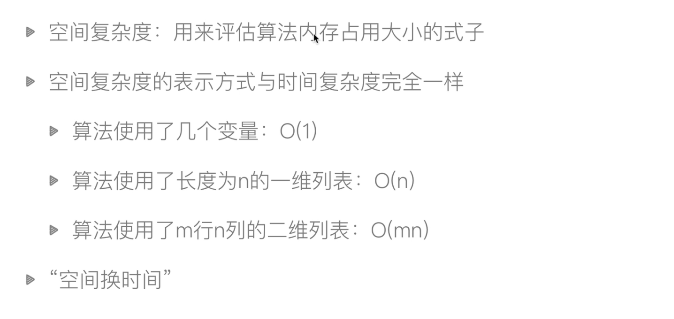

# 递归

## 递归是一种优雅的算法

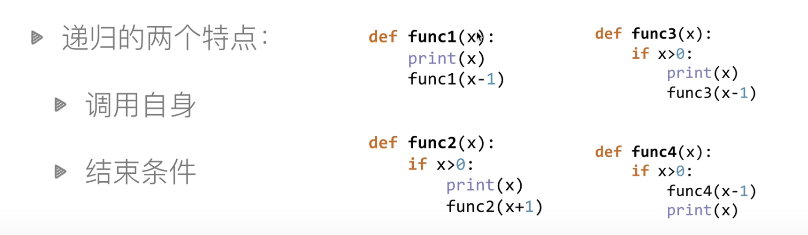

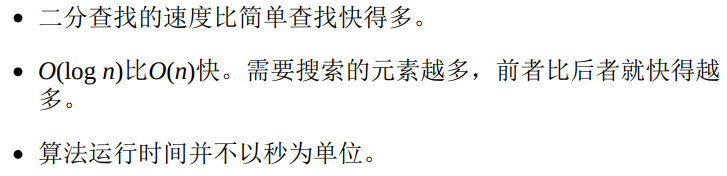
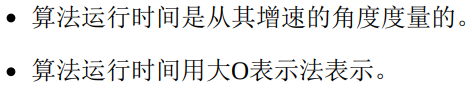

In [1]:
def two_Split(search_num,all_num):
    a = 0
    high = len(all_num) - 1
    low  = 0
    while low <= high:
        mid = (high + low) // 2
        a = a + 1
        if all_num[mid] == search_num:
            return a,mid
        if all_num[mid] < search_num:
            low = mid + 1
        else:
            high = mid - 1
    return a,None
num = 2
list1 = [1,2,3,4,5,6,7,8,9]
cnt,ID = two_Split(num,list1)
if ID != None:
    print("找到了！找了%s次,在第%s个"%(cnt,ID))
else:
    print("没找到，找了%s次"%cnt)

找到了！找了2次,在第1个


# 二分搜索例题

## 难度※※

* 给定一个排序数组和一个目标值，在数组中找到目标值，并返回其索引。如果目标值不存在于数组中，返回它将会被按顺序插入的位置。
* 请必须使用时间复杂度为 O(log n) 的算法
*输入: nums = [1,3,5,6], target = 5
*输出: 2
*输入: nums = [1,3,5,6], target = 2
*输出: 1
*输入: nums = [1,3,5,6], target = 7
*输出: 4

In [14]:
# 方法一：利用python的内置函数
def Q1_way1(nums,target):
    if target not in nums:
        nums.append(target)
        nums.sort()
    return nums.index(target)
l1 = [1,2,4,5,6]
a = 3
Q1_way1(l1,a)

2

In [21]:
# 方法二：利用二分法查找
def Q1_way2(nums,target):
    low = 0
    high = len(nums) - 1
    while low <= high:
        mid = int((high + low) / 2)
        if nums[mid] < target:
            low = mid + 1
        if nums[mid] > target:
            high = mid - 1
        if nums[mid] == target:
            return mid
    if nums[mid] > target:
        return mid 
    else:
        return mid + 1    
l1 = [1,3,5,6]
a = 0
Q1_way2(l1,a)

0

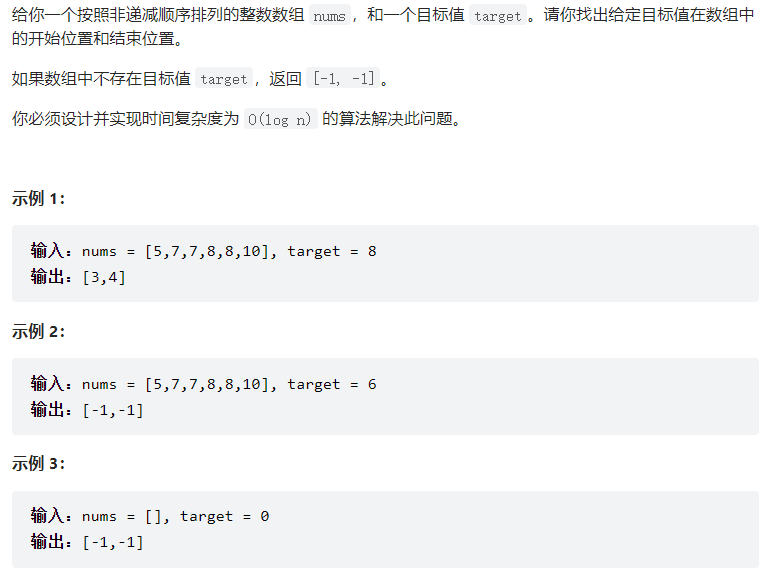

In [ ]:
class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        low = 0
        high = len(nums) - 1
        while low <= high:
            mid = (low + high) // 2
            if nums[mid] == target:
                left = mid
                right = mid
                if nums[len(nums)-1]== target:
                    right = len(nums)
                    while nums[left] == target and left != -1:
                        left = left - 1
                
                else:
                    while nums[left] == target :
                        left = left - 1
                    while nums[right] == target :
                        right = right + 1
                return [left + 1,right - 1]
            if nums[mid] > target:
                high = mid - 1
            else:
                low = mid + 1

        return [-1,-1]

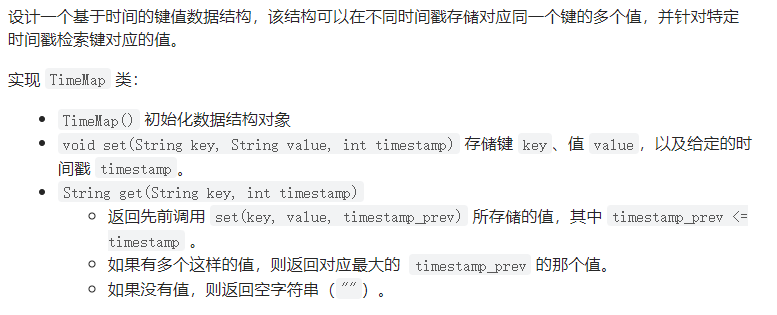
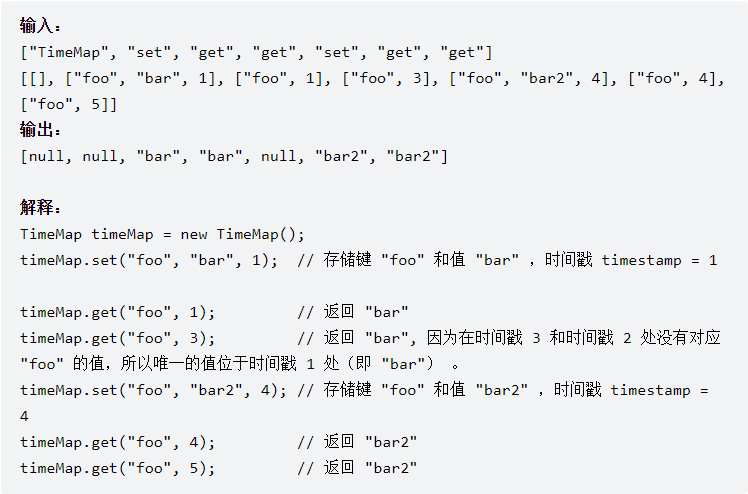

In [ ]:
from collections import defaultdict
from sortedcontainers import SortedList
import bisect


class TimeMap:

    def __init__(self):
        self.tm = defaultdict(list)
        self.value = defaultdict(list)


    def set(self, key: str, value: str, timestamp: int) -> None:
        self.value[key].append(value)
        self.tm[key].append(timestamp)


    def get(self, key: str, timestamp: int) -> str:
        if not self.tm[key]:
            return ""
        i = bisect.bisect_left(self.tm[key], timestamp)
        if 0<=i<len(self.tm[key]) and self.tm[key][i] == timestamp:
            return self.value[key][i]
        if 0<=i-1<len(self.tm[key]) and self.tm[key][i-1]<=timestamp:
            return self.value[key][i-1]
        return ""

## 难度※※※

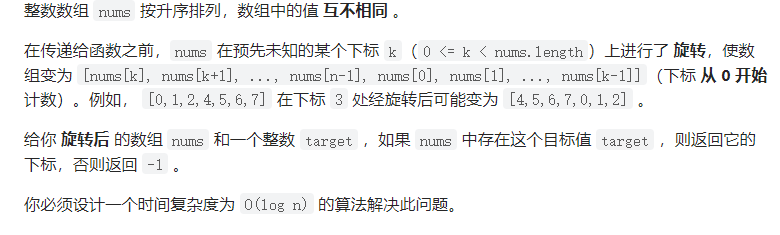
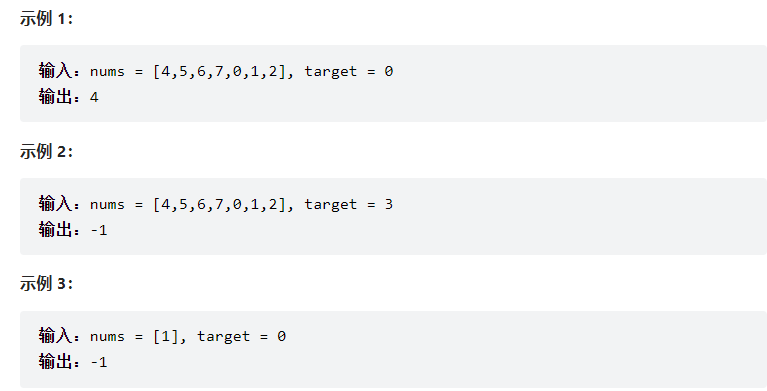

In [ ]:
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        low = 0 
        high = len(nums) - 1
        while low <= high:
            mid  = (low+high) // 2
            if nums[mid] == target:
                return mid
            if nums[0] <=  nums[mid]:
                if nums[0] <= target <= nums[mid]:
                    high = mid - 1
                else:
                    low = mid + 1
            else:
                if nums[mid] <= target <= nums[high]:
                    low = mid + 1
                else:
                    high = mid- 1
        return -1

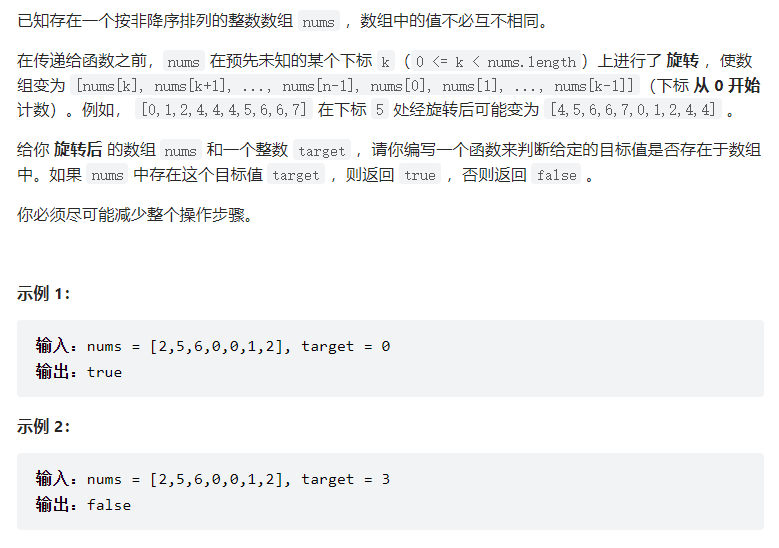

In [ ]:
class Solution:
    def search(self, nums: List[int], target: int) -> bool:
        if not nums:
            return False
            '''
        if len(nums) == 1:
            return nums[0] == target
            '''

        low = 0
        high = len(nums) - 1
        while low <= high:
            mid = (low + high) // 2
            if nums[mid] == target:
                return True
            elif nums[low] == nums[mid] and   nums[high] == nums[mid]:
                low = low + 1
                high = high - 1
            elif nums[low] <= nums[mid]:
                if nums[low] <= target <= nums[mid]:
                    high = mid - 1
                else:
                    low = mid + 1
            else:
                if nums[mid] <= target <= nums[high]:
                    low = mid + 1
                else:
                    high = mid - 1
        return False